In [1]:
import numpy as np 
import torch 
from scipy.special import hyp2f1
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
plt.style.use('seaborn')

/tmp/ipykernel_120476/3599727573.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [74]:
x = 0.59*np.logspace(-3, 3, 50)

xlog = np.log(x)

yhp = 3.9 * x ** (-2./3) / np.sqrt(hyp2f1(1/3, 17/6, 4/3, -(x**(-2))))
yhplog = np.log(yhp)
# yhp = hyp2f1(1/3, 17/6, 4/3, -(x**(-2)))

In [75]:
regressor = LinearRegression() 
regressor.fit(xlog.reshape(-1, 1), yhplog.reshape(-1, 1)) 

y_pred = np.exp(regressor.predict(x.reshape(-1, 1)))

In [80]:
def gpu_linreg(x, coefficient, intercept): 
    return np.exp(coefficient * np.log(x) + intercept)

In [77]:
regressor.intercept_, regressor.coef_

(array([2.04199425]), array([[-0.87114163]]))

In [69]:
from drdmannturb import MannEddyLifetime

                
tau_ref = 3.9 * MannEddyLifetime(0.59 * x)

r2 = LinearRegression() 
r2.fit(xlog.reshape(-1, 1), np.log10(tau_ref))

r2.coef_, r2.intercept_

(array([-0.88896267]), 1.0810233014155988)

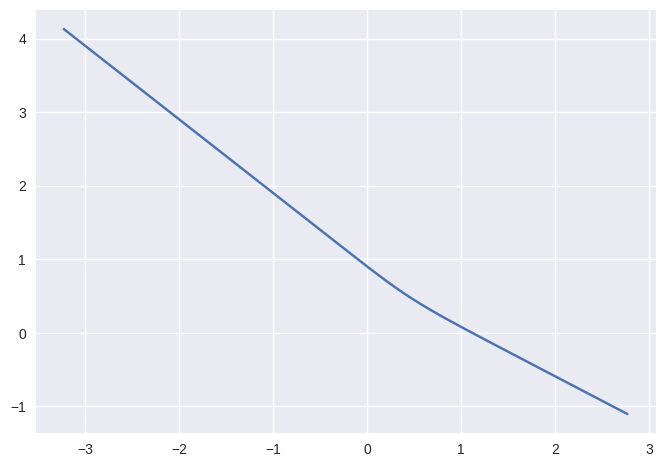

In [70]:
plt.plot(xlog, np.log10(tau_ref))

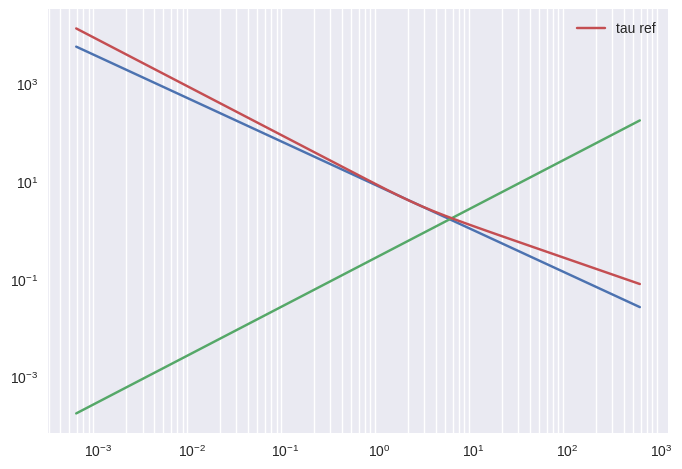

In [82]:
# plt.plot(x, yhp, label=r"$\frac{x^{-2/3}}{ {}_2F_1(1/3, 17/6, 4/3, -x^2)}$")
# plt.plot(x, y_pred, label="Line of Best Fit")
plt.plot(x, gpu_linreg(x, -0.88896267, 2.04199425))#regressor.coef_.flatten(), regressor.intercept_))
plt.plot(x, 2*np.pi * x / 21.)
plt.plot(x, tau_ref, label="tau ref")
# plt.plot(x, gpu_linreg(xlog,  -0.37036391, 0.3012279013400017,))
plt.yscale('log')
plt.xscale('log')
plt.grid(which="both")
plt.legend()